Made by Riccardo Riva, Denis Stanev, Michele Umassi.
(in alphbetical order)

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import time

from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches



print(tf.__version__)

2.3.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The data file can be found here: https://archive.ics.uci.edu/ml/datasets/MiniBooNE+particle+identification

In [ ]:
filename="/content/drive/My Drive/ProjectGroup64/MiniBooNE_PID.txt" #path to the data file
#filename="MiniBooNE_PID.txt" #use this if you have uploaded the dataset to colab
dataPD = pd.read_csv(filename, skiprows=1, header = None, sep='\s+')

In [ ]:
dataPD

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,4.18624,135.885000,0.928671,0.140918,2.58663,1689.070,1.197950,19.35610,0.398340,0.658684,1.561270,0.320885,108.8560,5.16994,0.491493,0.868283,29.6141,1.222990,0.190005,-0.654163,4.97666,0.908007,0.385076,377.412,0.136108,0.310650,2.952640,-4.55567,0.934167,0.049752,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,4.65578,331.718000,0.882784,0.368855,2.24638,1388.260,0.839230,6.69510,0.277778,0.944626,1.664640,0.256501,102.4930,5.33218,0.474294,-0.336652,31.5767,1.317170,0.141945,0.093886,5.05478,1.394390,0.325034,215.837,0.082048,0.297530,0.777241,-4.76871,1.438210,0.068714,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,4.50807,159.396000,0.412250,0.434002,2.38485,992.098,0.514175,16.00300,0.256262,0.318984,-0.727361,0.312139,69.8362,3.44976,0.497076,-0.314786,59.2516,1.187650,0.192565,-0.511144,5.27196,1.002860,1.690870,417.430,0.068628,0.220612,1.390970,-2.02213,1.843790,0.085132,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,4.08041,-1.865600,0.833067,0.181294,2.49837,1289.160,0.630307,12.93740,0.266055,1.313580,0.698101,0.306193,148.0340,4.12461,0.494778,0.331151,17.8265,1.700340,0.147487,0.313964,7.91668,1.584410,0.557134,352.699,0.079246,0.338915,-0.331218,-3.52184,1.244390,0.105550,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,4.59180,183.668000,0.398421,0.353034,2.04136,949.231,0.389585,13.91750,0.281003,0.282402,-0.039672,0.233509,106.8670,2.94245,0.464260,-0.033102,139.4700,1.687930,0.117804,0.021927,7.80990,1.317420,0.677348,317.556,0.041526,0.249403,-0.360560,-3.18766,1.808670,0.105852,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,4.09329,-0.707947,0.813344,0.015294,1.83104,520.017,0.192353,7.59299,0.271739,0.580181,2.706590,0.321739,18.9165,4.77587,0.488641,0.578023,106.1100,1.827670,0.174318,0.523787,7.59281,1.451220,0.616285,453.588,0.015260,0.291661,-0.445277,-3.02319,1.513750,0.055040,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,4.23870,49.729900,0.527637,0.337350,2.32783,779.822,0.295920,12.35990,0.280488,1.630800,-0.447177,0.302846,64.8961,2.66737,0.443424,-0.060302,149.7250,1.565400,0.138097,0.199993,7.29614,1.130380,1.100050,414.089,0.072055,0.288639,0.780298,-2.74524,1.216240,0.110098,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.167382,1.318900,0.870681,3.43055,0.279588,4.29747,79.969100,0.744210,0.172433,2.89811,692.648,0.305626,25.02150,0.267857,0.771662,-0.151477,0.300000,37.4606,4.77219,0.467596,1.066670,75.3743,0.913304,0.318109,-0.571088,3.89183,0.765222,1.904240,463.529,0.084408,0.220039,3.160320,-2.03983,1.366010,0.066955,83.082,-34.31190,0.360148,8.16491,0.000000,0.124182,0.016155,0.789276,0.730342,0.152876
130062,5.44560,1.845700,103.4630,0.287411,0.015929,0.107495,0.679931,0.786533,3.4

In [ ]:
dataPD.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
count,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.00000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,1.300640e+05,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000
mean,1.251799,-2.107551,123.795041,-3.312518,-3.585353,-3.434412,-2.627901,-2.773691,-0.155680,-3.421357,0.710009,161.44718,-3.145047,-3.285249,-1.352734,933.035237,-3.140898,23.311479,-3.327389,1.199082e+02,-3.694561,-3.287157,80.653017,0.238256,-3.155569,-4.194071,97.404023,-2.034008,-3.421595,-3.899097,3.952318,-2.583108,-2.382034,361.938693,-3.521735,-3.299962,-3.205368,-6.364896,-2.318157,-3.503491,141.180058,-25.225963,-2.863924,2.393149,-3.585605,-3.416491,-3.753232,-0.744964,-1.987056,-3.364752
std,60.119987,59.913094,196.010686,59.834554,59.818130,59.827325,59.876644,59.866946,60.024786,59.828000,60.077218,134.25003,59.846865,59.836651,59.956390,652.826458,59.846285,68.403499,59.833653,4.436769e+04,59.840957,59.836068,106.955799,60.074807,59.843984,59.817821,98.221965,59.911913,59.827995,59.802232,60.315151,59.879608,59.895210,126.437913,59.821967,59.835319,59.847039,59.659409,59.894970,59.823062,75.499342,67.576409,59.873958,60.349468,59.818121,59.828330,59.816001,60.019330,59.946144,59.831409
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-1.725670e+04,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,4.012528,0.876346,49.295075,0.241571,0.000000,0.085307,0.715269,0.783392,3.284817,0.142853,4.151558,73.39155,0.148850,0.111637,1.778075,562.798750,0.213925,9.893847,0.233480,4.670138e-01,-0.858019,0.276786,35.937050,2.685815,0.414182,-0.936476,33.047225,1.391660,0.136073,-0.686726,5.894515,0.748709,0.644313,305.134250,0.040081,0.247846,-0.202194,-3.486058,1.091370,0.065012,122.901750,-40.068250,-0.028108,3.413030,0.000000,0.121963,-0.342814,1.420265,0.274271,0.197322
50%,4.787715,1.381965,106.135500,0.272089,0.004975,0.141175,0.922700,0.833937,3.426990,0.170561,4.289100,155.75950,0.633301,0.243926,2.095610,732.302000,0.314829,18.268050,0.260163,7.849920e-01,0.216257,0.307028,57.869500,3.504500,0.459430,0.001025,109.063000,1.559450,0.164071,-0.252294,7.208120,1.031620,1.043200,385.883500,0.067106,0.291816,0.202368,-2.734280,1.269810,0.083625,145.414500,-21.591600,0.459050,4.762385,0.000000,0.168528,0.041723,2.364455,1.123760,0.231328
75%,5.628298,1.947870,138.849250,0.315095,0.013136,0.212879,1.180252,0.874198,3.585462,0.199982,4.434990,244.56075,0.873291,0.468700,2.524450,1048.532500,0.507608,33.130725,0.293595,1.076790e+00,0.946391,0.337740,98.039800,4.564890,0.483255,0.399213,145.078000,1.716133,0.202773,0.091160,8.823630,1.294013,1.600693,444.887250,0.100735,0.339142,0.777977,-2.064707,1.450822,0.107270,167.087750,-3.330192,1.150463,6.857450,0.001984,0.224737,0.294544,3.777613,2.281242,0.263201
max,17.057300,8.802820,4747.670000,0.736804,0.179012,0.703859,6.241080,0.989713,7.170170,0.524888,9.559340

As we can see, many of the features have -999 as their minimun value. As we'll see a bit later, these values seem to be spurious points, which will need to be handled.

In [ ]:
dataPD.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.999826,0.343025,0.999822,0.999813,0.999796,0.999754,0.999798,0.999841,0.999809,0.999798,0.520628,0.999721,0.999827,0.999640,0.168717,0.999711,0.899442,0.999812,0.001496,0.999156,0.999810,0.600894,0.999221,0.999806,0.998952,0.674379,0.999854,0.999816,0.999754,0.999559,0.999737,0.999830,0.646224,0.999807,0.999808,0.999573,0.999819,0.999804,0.999818,0.909105,0.862978,0.999614,0.997404,0.999817,0.999823,0.999584,0.999673,0.999596,0.999812
1,0.999826,1.000000,0.341175,0.999899,0.999896,0.999886,0.999863,0.999888,0.999913,0.999895,0.999894,0.519668,0.999810,0.999892,0.999737,0.168248,0.999809,0.897652,0.999899,0.001494,0.999359,0.999894,0.600185,0.999414,0.999893,0.999198,0.670120,0.999899,0.999898,0.999798,0.999270,0.999850,0.999875,0.647911,0.999895,0.999897,0.999770,0.999860,0.999867,0.999898,0.905263,0.863771,0.999782,0.997311,0.999898,0.999898,0.999738,0.999485,0.999500,0.999895
2,0.343025,0.341175,1.000000,0.344242,0.344253,0.343543,0.344286,0.344403,0.343701,0.344165,0.343853,-0.000712,0.344937,0.344351,0.347713,0.352516,0.345775,0.384120,0.344148,-0.000391,0.343124,0.344309,0.458442,0.340868,0.344259,0.345540,0.358763,0.344173,0.344201,0.344953,0.345053,0.344101,0.344498,0.269406,0.344242,0.344105,0.344132,0.344444,0.344517,0.344278,0.350917,0.315000,0.342675,0.337026,0.344217,0.344386,0.343991,0.343523,0.342137,0.344228
3,0.999822,0.999899,0.344242,1.000000,0.999999,0.999997,0.999981,0.999998,0.999991,0.999999,0.999982,0.519456,0.999960,0.999991,0.999928,0.177639,0.999973,0.898203,0.999999,0.001513,0.999512,0.999999,0.606392,0.999548,0.999999,0.999394,0.670996,0.999992,0.999999,0.999949,0.999288,0.999975,0.999923,0.646836,0.999999,0.999998,0.999894,0.999865,0.999989,0.999999,0.907584,0.865789,0.999790,0.997144,0.999999,0.999999,0.999866,0.999506,0.999475,0.999999
4,0.999813,0.999896,0.344253,0.999999,1.000000,0.999998,0.999984,0.999999,0.999991,1.000000,0.999984,0.519455,0.999962,0.999992,0.999933,0.177941,0.999976,0.898121,1.000000,0.001515,0.999508,1.000000,0.606681,0.999552,1.000000,0.999393,0.670786,0.999991,1.000000,0.999951,0.999268,0.999979,0.999920,0.646819,1.000000,0.999999,0.999899,0.999860,0.999989,1.000000,0.907543,0.865965,0.999791,0.997150,1.000000,0.999999,0.999866,0.999490,0.999466,1.000000
5,0.999796,0.999886,0.343543,0.999997,0.999998,1.000000,0.999985,0.999998,0.999987,0.999998,0.999982,0.519820,0.999964,0.999989,0.999936,0.178550,0.999980,0.897969,0.999998,0.001518,0.999516,0.999998,0.607010,0.999565,0.999998,0.999399,0.670390,0.999986,0.999997,0.999951,0.999240,0.999981,0.999909,0.646608,0.999998,0.999998,0.999904,0.999843,0.999987,0.999997,0.907561,0.866176,0.999784,0.997130,0.999998,0.999996,0.999868,0.999467,0.999447,0.999998
6,0.999754,0.999863,0.344286,0.999981,0.999984,0.999985,1.000000,0.999985,0.999974,0.999986,0.999969,0.518734,0.999956,0.999973,0.999940,0.179448,0.999973,0.898182,0.999984,0.001509,0.999514,0.999984,0.607714,0.999579,0.999984,0.999404,0.669670,0.999967,0.999983,0.999937,0.999161,0.999972,0.999892,0.647303,0.999985,0.999984,0.999910,0.999821,0.999971,0.999983,0.907032,0.866492,0.999779,0.997099,0.999983,0.999980,0.999855,0.999404,0.999421,0.999983
7,0.999798,0.999888,0.344403,0.999998,0.999999,0.999998,0.999985,1.000000,0.999988,0.999999,0.999983,0.519089,0.999965,0.999990,0.999940,0.178448,0.999980,0.898159,0.999999,0.001518,0.999514,0.999999,0.607007,0.999557,0.999999,0.999407,0.670738,0.999987,0.999999,0.999949,0.999240,0.999980,0.999915,0.647126,0.999999,0.999999,0.999905,0.999853,0.999988,0.999999,0.907407,0.866137,0.999789,0.997123,0.999999,0.999998,0.999873,0.999466,0.999452,0.999999
8,0.999841,0.999913,0.343701,0.999991,0.999991,0.999987,0.999974,0.999988,1.000000,0.999990,0.999989,0.520323,0.999945,0.999990,0.999903,0.176306,0.999955,0.898296,0.999992,0.001501,0.999450,0.999989,0.605522,0.999536,0.999989,0.999311,0.670

Many of the features seem to be strongly correlated.

#**Feature analysis**

In [ ]:
# Convert to numpy array for handling, and creating a labels array as indicated by the authors
data = dataPD.to_numpy()
labels=np.concatenate((np.ones(36499, dtype=int),np.zeros(93565, dtype=int)))

In [ ]:
# We create a copy of the dataset in which ill values are substituted with the feature's mean
# computed without considering these bad values (we don't create a void or a NaN)

data_0 = data.copy()

for i in range(50):
    positions = np.where(data[:, i] == -999.0)
    for j in positions:
        data_0[j, i] = np.mean(data[:, i][data[:, i] != -999.0])

In [ ]:
# We do the same thing with feature 20 (index 19 of the array)
data_0[np.where(data[:, 19] == 16000900.0), 19] = np.mean(data[:, 19][data[:, 19] != 16000900.0])

# from plots we see there are more strange values and we change them too
for i in range(3):
    positions = np.where(data_0[:, 19] == np.amin(data_0[:, 19])) 
    # at every change we redo the cycle (we know that these bads values are just 3)
    data_0[positions, 19] = np.mean(data_0[:, 19][data_0[:, 19] > -9670.0]) 

# there is another bad value at 123. 
positions = np.where(data_0[:, 19] == np.amax(data_0[:, 19]))

for i in positions:
      data_0[i, 19] = np.mean(data_0[:, 19][data_0[:, 19] < 123]) 

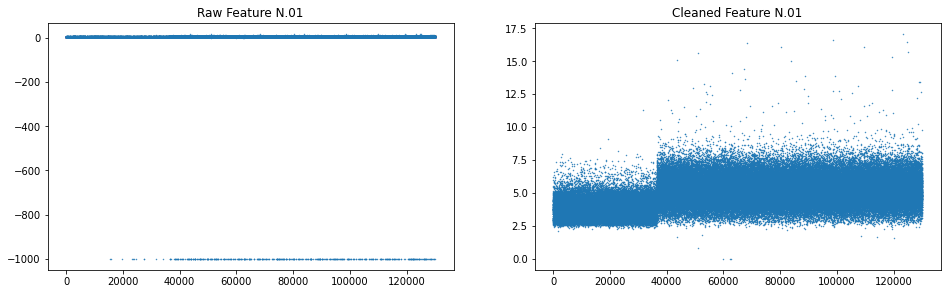

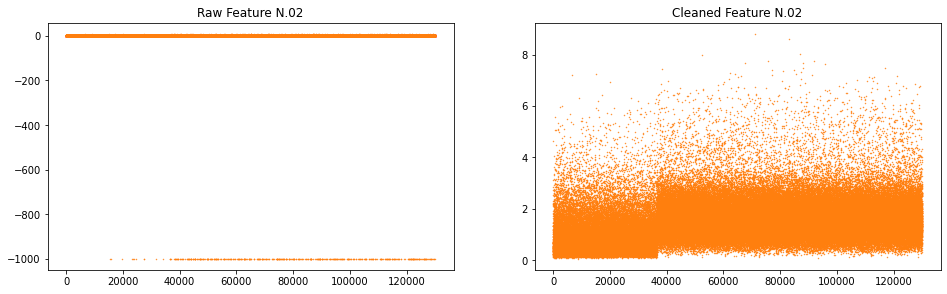

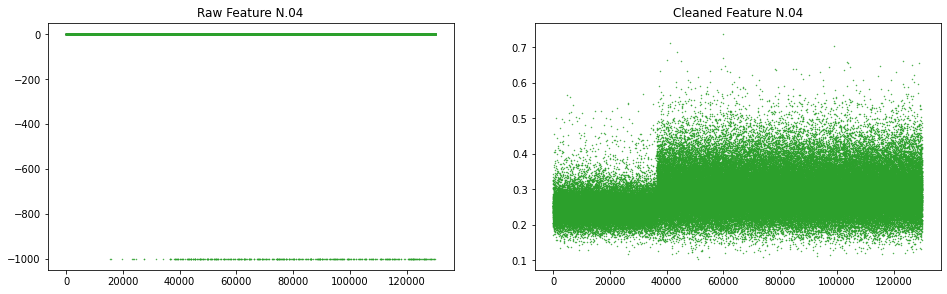

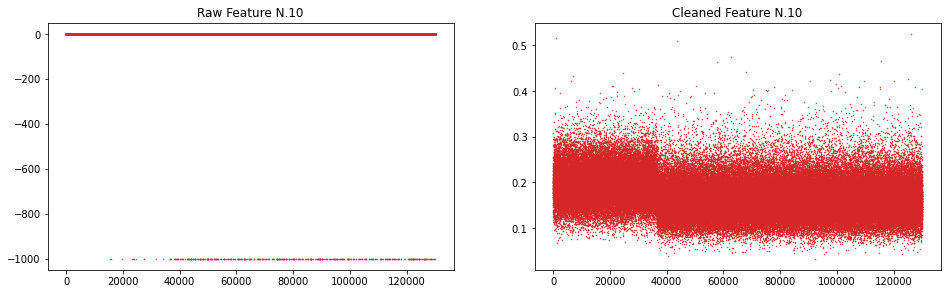

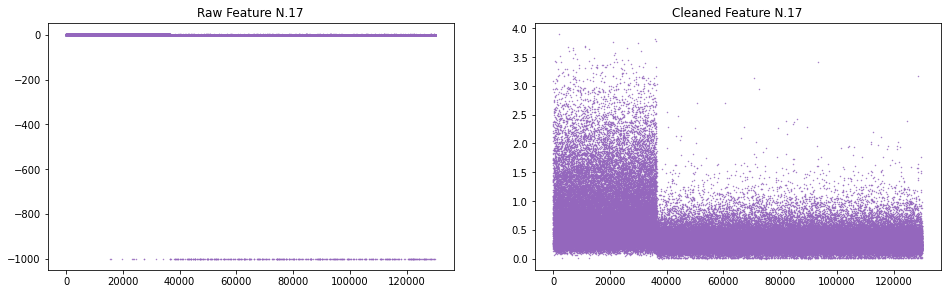

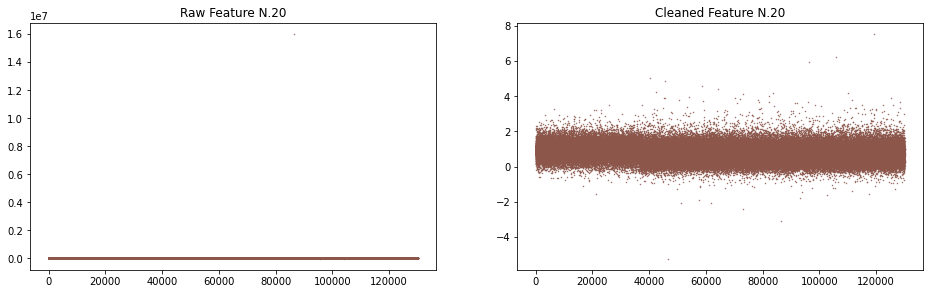

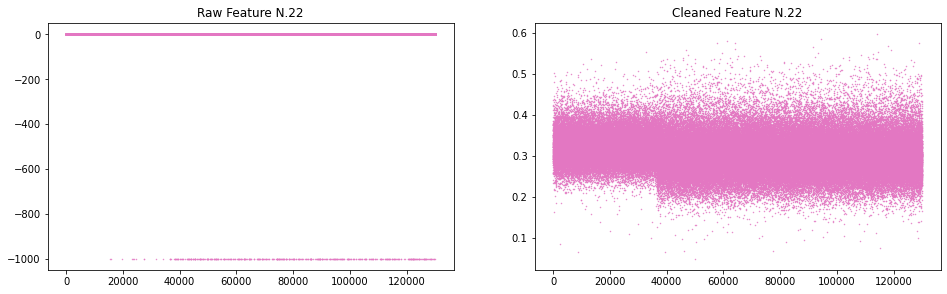

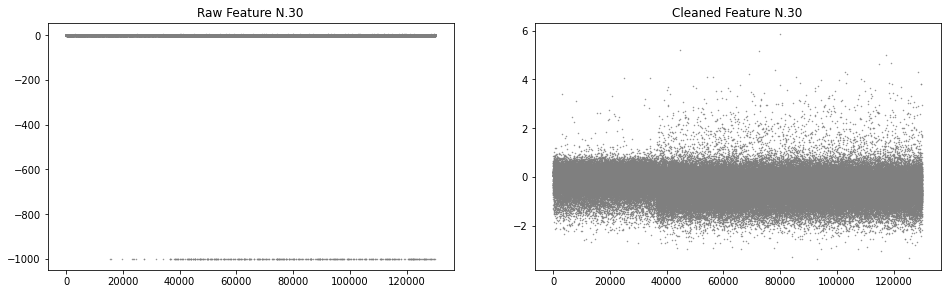

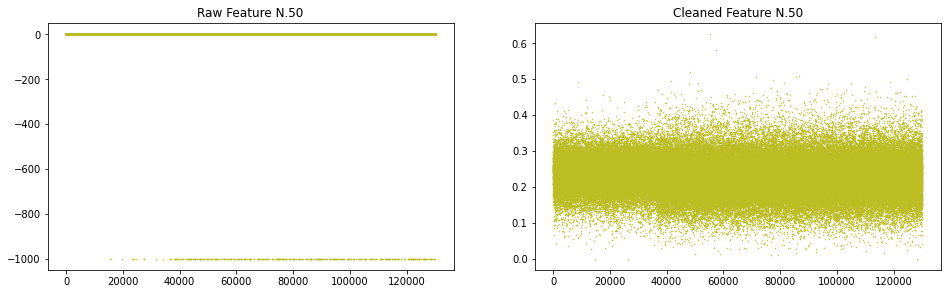

In [ ]:
# Plots of the features before and after cleaning

# Defining some cool colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = 5*(colors)

# Here we choose the most interesting features to look at
# It's possible to add more features, numbers can go from 0 to 49
choosed_features = [0, 1, 3, 9, 16, 19, 21, 29, 49]
x = range(130064)
pos = 0

for i in choosed_features:
    plt.figure(figsize=(16,10))
    # for j in range(1):
    plt.subplot(2, 2, 1)
    plt.scatter(x, data[:, i], s = 0.2, c = colors[pos])
    plt.title('Raw Feature N.{0:02d}'.format(i + 1))
    plt.subplot(2, 2, 2)
    plt.scatter(x, data_0[:, i], s = 0.2, c = colors[pos])
    plt.title('Cleaned Feature N.{0:02d}'.format(i + 1))
    pos += 1


#**PCA**

We now run a PCA to quickly visualize the data, and see the difference between the cleaned data and the original data (with only the point 1e7 removed, as keeping that value would render one of the PCA components useless).

In [ ]:
# original data with only the 1e7 value removed
dataTemp = data.copy()
dataTemp[np.where(data[:, 19] == 16000900.0), 19] = np.mean(data[:, 19][data[:, 19] != 16000900.0])

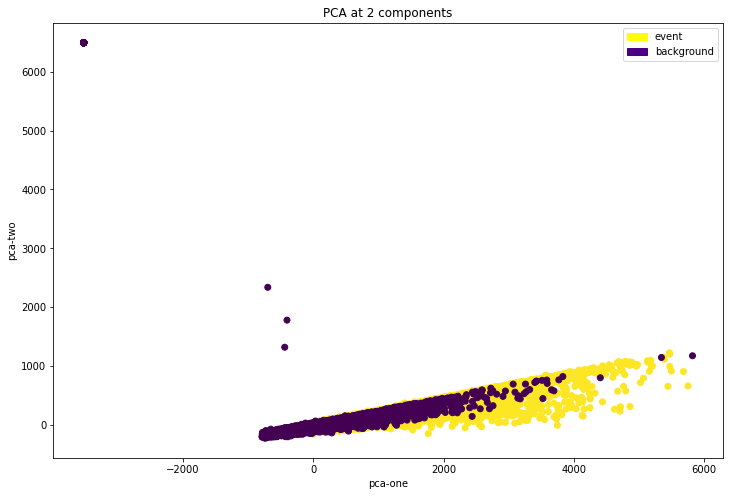

In [ ]:
# PCA with uncleaned data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataTemp)


plt.figure(figsize = (12, 8))

yellow = mpatches.Patch(color='yellow', label='event')
violet = mpatches.Patch(color = 'indigo', label='background')

plt.scatter(x=pca_result[:,0], y=pca_result[:,1] , c=labels[:])
plt.xlabel("pca-one")
plt.ylabel("pca-two")
plt.title('PCA at 2 components')
plt.legend(handles = [yellow, violet])
plt.savefig("PCABad.png") 


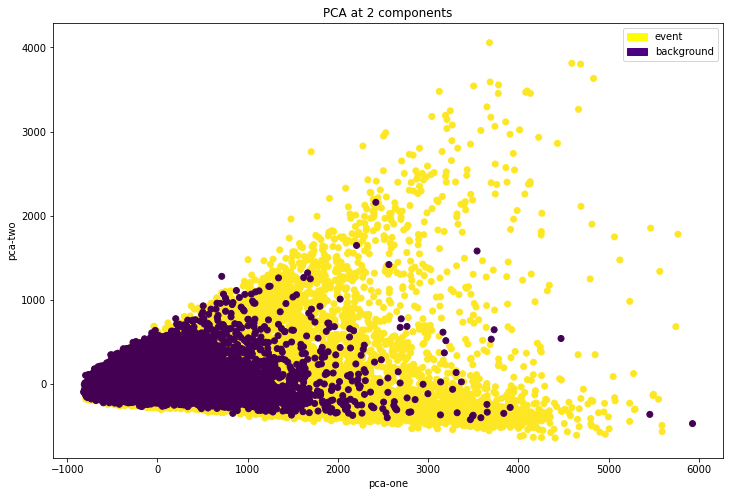

In [ ]:
#PCA with cleaned data

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_0)


plt.figure(figsize = (12, 8))

yellow = mpatches.Patch(color='yellow', label='event')
violet = mpatches.Patch(color = 'indigo', label='background')

plt.scatter(x=pca_result[:,0], y=pca_result[:,1] , c=labels[:])
plt.xlabel("pca-one")
plt.ylabel("pca-two")
plt.title('PCA at 2 components')
plt.legend(handles = [yellow, violet])
plt.savefig("PCA.png") 

As we can clearly see, cleaning up some of the values leads to a better PCA, and will allow the features to be normalized better and give better results in the neural network.

#**Boosted Decision Tree**

In this section we will replicate the method used in the paper "Boosted Decision Trees as an Alternative to Artificial Neural Networks for Particle
Identification".

The first thing we do is split the dataset into a training and a test set. We use the original dataset without cleaning the values, as the original paper did not mention doing it. We also tested how the results changed if we used the cleaned values for the BDT too, but no significant difference was noticed.

In [ ]:
train_to_test_ratio=0.8
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,train_size=train_to_test_ratio) # here we use the original dataset

Following their instructions, we use AdaBoost with a tree classifier with max_leaf_nodes=45, 1000 estimators and a learning rate of 0.5.

**Warning: this classifier takes a long time to train (slightly more than an hour on Colab)**

In [ ]:
t0= time.clock()
AdaClassifier = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_leaf_nodes=45), n_estimators=1000, learning_rate=0.5)
AdaClassifier.fit(X_train, Y_train)
t1 = time.clock() - t0
print("Time elapsed: ", t1) # CPU seconds
AdaClassifier_train_accuracy = AdaClassifier.score(X_train,Y_train)
AdaClassifier_test_accuracy = AdaClassifier.score(X_test,Y_test)
print("Train accuracy: %.4f   Test accuracy: %.4f" % (AdaClassifier_train_accuracy, AdaClassifier_test_accuracy))

Time elapsed:  4135.537783
Train accuracy: 0.9999   Test accuracy: 0.9467


As we can see we usually get an accuracy in the range of 94.5%. Unfortunately the original paper does not state what their accuracy was in absolute value, but since we followed the same method it's likely that our result is similar to theirs. 

In [ ]:
predAda = AdaClassifier.predict(X_test)
predProba = AdaClassifier.predict_proba(X_test)

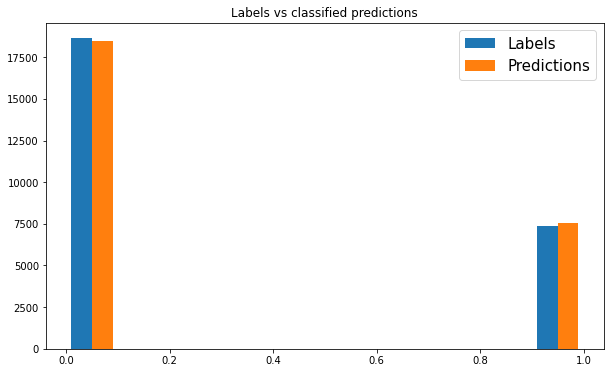

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist([Y_test, predAda])
plt.title('Labels vs classified predictions')
plt.legend(['Labels', 'Predictions'], fontsize=15)
plt.savefig("HistAda.pdf")

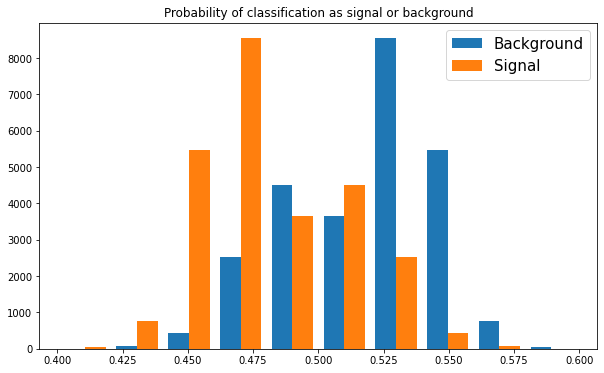

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(predProba)
plt.title('Probability of classification as signal or background')
plt.legend(['Background', 'Signal'], fontsize=15)
plt.savefig("ProbAda.pdf")

As we can see the Adaboost probabilities are grouped near the 0.5 value.

#**Our Neural Network**

We split the dataset into train and test sets.

In [ ]:
train_to_test_ratio=0.8
X_train,X_test,Y_train,Y_test=train_test_split(data_0,labels,train_size=train_to_test_ratio) # here we use the enhanced dataset

And normalize the values to a 0 centered gaussian distribution.

In [ ]:
normalizer = Normalization(axis=-1)
normalizer.adapt(X_train)
X_train = normalizer(X_train)
print('var normalized train set: %.4f' % np.var(X_train))
print('mean normalized train set: %.4f' % np.mean(X_train))
X_test = normalizer(X_test)
print('var normalized test set: %.4f' % np.var(X_test))
print('mean normalized test set: %.4f' % np.mean(X_test))
X_train = X_train.numpy()
X_test = X_test.numpy()

var normalized train set: 1.0000
mean normalized train set: 0.0000
var normalized test set: 0.9912
mean normalized test set: -0.0009


We now build the neural network. We commented out the batch normalization layers, as they didn't seem to improve the result, and made training significantly slower. We decided to use the ELU activation function, as it gave the best results out of the ones we tried.

Model: "OurNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 50)]              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 256)               13056     
_________________________________________________________________
tf_op_layer_Elu_56 (TensorFl [(None, 256)]             0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
tf_op_layer_Elu_57 (TensorFl [(None, 128)]             0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 128)               0    

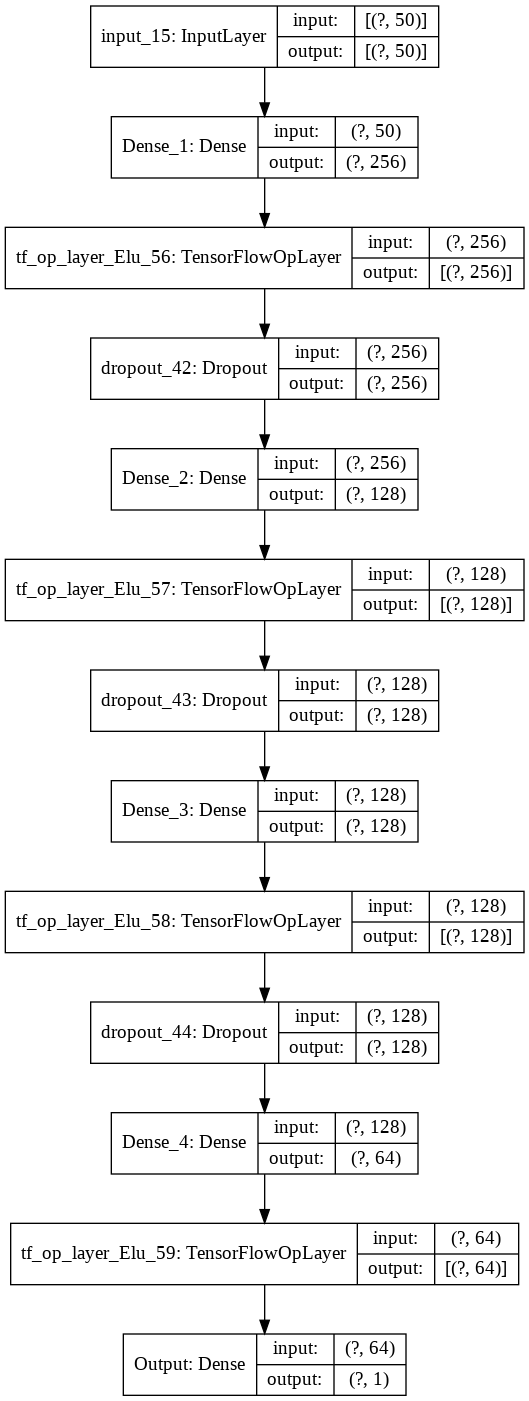

In [ ]:
inputs = keras.Input(shape=(50))
x = inputs

x = keras.layers.Dense(256, name='Dense_1')(x)
#x = keras.layers.BatchNormalization()(x)
x = tf.keras.activations.elu(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, name='Dense_2')(x)
#x = keras.layers.BatchNormalization()(x)
x = tf.keras.activations.elu(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, name='Dense_3')(x)
#x = keras.layers.BatchNormalization()(x)
x = tf.keras.activations.elu(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(64, name='Dense_4')(x)
#x = keras.layers.BatchNormalization()(x)
x = tf.keras.activations.elu(x)

outputs = keras.layers.Dense(1, name='Output', activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='OurNet')

model.summary()

keras.utils.plot_model(model, show_shapes=True)

We now proceed to define the hyperparameters and train the model. We use a relatively new technique described in [this paper](https://arxiv.org/pdf/1711.00489.pdf) in which we increase the batch size instead of decreasing the learning rate, which has the same effect on the final loss, but is faster.

In [ ]:
#We define the hyperparameters and compile the model

LR_ST=1e-3
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR_ST)
loss = tf.keras.losses.BinaryCrossentropy()
mae = tf.keras.metrics.MeanAbsoluteError()
EAGERLY = False

model.compile(optimizer=OPTIMIZER,
              loss=loss,
              metrics=[mae],
              run_eagerly=EAGERLY)

#learning rate scheduler and model checkpoint callbacks

def lr_decay(epoch):
  if epoch < 20:
    return LR_ST
  else:
    return LR_ST * tf.math.exp(0.2 * (20 - epoch))

lr_scheduler = keras.callbacks.LearningRateScheduler(lr_decay)

model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath='Best_MLP',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        save_weights_only=True, 
        save_freq='epoch')

callbacks = [ lr_scheduler, model_checkpoint ]

#initializing the arrays for saving the loss and mae values

mae = []
val_mae = []
loss = []
val_loss = []

# training the model with increasing batch size

t0 = time.clock()
bSize = 32 

for i in range(9):
  print(bSize)
  history = model.fit(X_train, Y_train, epochs=5, batch_size=bSize, validation_split=0.2, shuffle=True, verbose=1)

  mae = np.append(mae, history.history['mean_absolute_error'])
  val_mae = np.append(val_mae, history.history['val_mean_absolute_error'])
  loss = np.append(loss, history.history['loss'])
  val_loss = np.append(val_loss, history.history['val_loss'])
  bSize = bSize * 2

#last part of training, with big batch size and decaying learning rate, to stabilize the value near the minimum

history = model.fit(X_train, Y_train, epochs=50, batch_size=8192, validation_split=0.2, shuffle=True, verbose=1, callbacks=callbacks)

mae = np.append(mae, history.history['mean_absolute_error'])
val_mae = np.append(val_mae, history.history['val_mean_absolute_error'])
loss = np.append(loss, history.history['loss'])
val_loss = np.append(val_loss, history.history['val_loss'])

t1 = time.clock() - t0
print("Time elapsed: ", t1) # CPU seconds

32
Epoch 1/5
2602/2602 [==============================] - 11s 4ms/step - loss: 0.1971 - mean_absolute_error: 0.1126 - val_loss: 0.1560 - val_mean_absolute_error: 0.0921
Epoch 2/5
2602/2602 [==============================] - 11s 4ms/step - loss: 0.1718 - mean_absolute_error: 0.0988 - val_loss: 0.1515 - val_mean_absolute_error: 0.0910
Epoch 3/5
2602/2602 [==============================] - 11s 4ms/step - loss: 0.1622 - mean_absolute_error: 0.0937 - val_loss: 0.1576 - val_mean_absolute_error: 0.0929
Epoch 4/5
2602/2602 [==============================] - 11s 4ms/step - loss: 0.1579 - mean_absolute_error: 0.0913 - val_loss: 0.1556 - val_mean_absolute_error: 0.0890
Epoch 5/5
2602/2602 [==============================] - 11s 4ms/step - loss: 0.1536 - mean_absolute_error: 0.0890 - val_loss: 0.1493 - val_mean_absolute_error: 0.0812
64
Epoch 1/5
1301/1301 [==============================] - 6s 5ms/step - loss: 0.1432 - mean_absolute_error: 0.0833 - val_loss: 0.1397 - val_mean_absolute_error: 0.0786

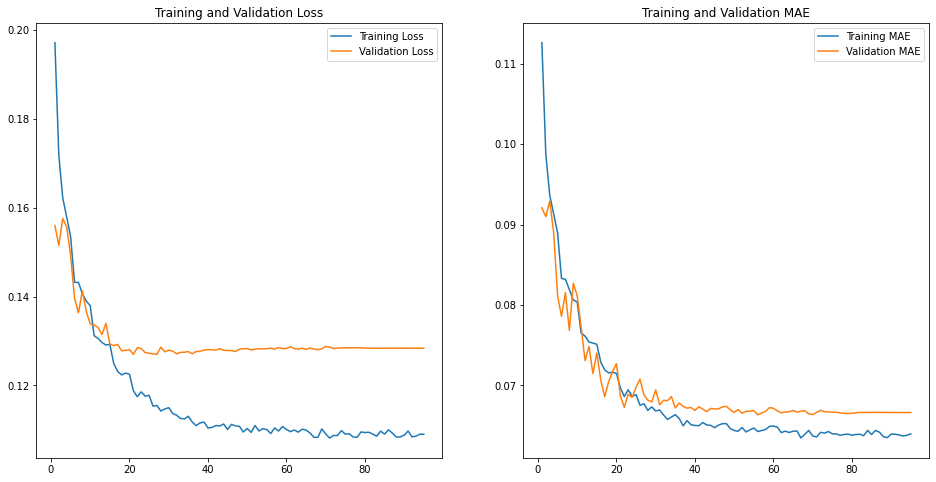

In [ ]:
epochs_range = range(1, len(val_loss) + 1)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.title('Training and Validation MAE')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("PlotLoss.pdf")
plt.show()


In [ ]:
test_loss, test_mae = model.evaluate(X_test,  Y_test, verbose=2)

813/813 - 2s - loss: 0.1215 - mean_absolute_error: 0.0650


Accuracy is tested by splitting the continuous predicted values

In [ ]:
pred = model.predict(X_test)

temp=0
labs = np.zeros(np.shape(pred)[0])
for j in range(np.shape(pred)[0]):
    if pred[j,0] > 0.5:
      labs[j]=1
    if Y_test[j]==labs[j]:
      temp += 1.
print(temp/np.shape(pred)[0])

0.9532925844769923


As we can see, our neural network has an accuracy that is on average 0.5% better than the Boosted Decision Tree described in the paper, and does so in less than one tenth of the time.

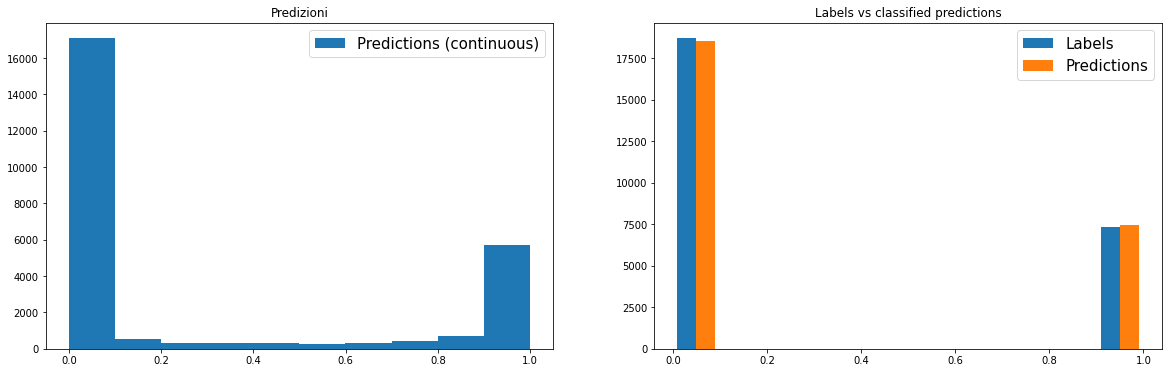

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.hist(pred[:,0])
plt.title('Predizioni')
plt.legend(['Predictions (continuous)'], fontsize=15)

plt.subplot(1,2,2)
plt.hist([Y_test, labs])
plt.title('Labels vs classified predictions')
plt.legend(['Labels', 'Predictions'], fontsize=15)

plt.savefig("HistNet.pdf")

We can see that our neural network learns by focusing predictions on the two marginal values (namely labels 0 and 1), whereas AdaBoost trees seem to concentrate its predictions in between

#**Conclusion**

For a more in depth discussion on the methods used and the results one can look at our paper.